# **Outlier**  

🔍 **Apa itu Outlier?**  
Outlier adalah data yang memiliki nilai yang sangat berbeda dibandingkan dengan data lainnya dalam suatu dataset.  

⚠ **Mengapa Outlier Muncul?**  
Outlier bisa terjadi karena:  
✅ **Kesalahan pengukuran** –  
✅ **Kesalahan input data** –

✅ **Fenomena yang jarang terjadi** –

🧐 **Mengapa Outlier Penting?**  
- Karena Bisa menyebabkan hasil analisis yang bias.
- Karena Dapat menunjukkan kejadian khusus yang perlu dianalisis lebih lanjut.  
- Karena Bisa membantu dalam deteksi anomali dalam sebuah data.

## **Deteksi Outlier Menggunakan Algoritma K-NN**  

---

**1. Rumus Jarak Euclidean**  
Rumus **jarak Euclidean** untuk satu dimensi (misalnya suhu):  

$$
d(x_i, x_j) = |x_i - x_j|
$$

Di mana:  
- \( x_i \) = nilai suhu titik data ke-\( i \)  
- \( x_j \) = nilai suhu titik data ke-\( j \)  

> 🔹 Untuk **multi-dimensi**, gunakan rumus:  
> $$
> d(x_i, x_j) = \sqrt{\sum_{k=1}^{n} (x_{ik} - x_{jk})^2}
> $$

---

**2. Rata-rata Jarak ke K Tetangga Terdekat**  
Setelah menghitung jarak ke semua titik, kita pilih **K tetangga terdekat** dan hitung **rata-rata jaraknya**:

$$
\bar{d}_i = \frac{1}{K} \sum_{j=1}^{K} d(x_i, x_j)
$$

Di mana:  
- \( 𝑑𝑖 \) = rata-rata jarak ke **K** tetangga terdekat dari titik **\( x_i \)**  
- \( K \) = jumlah tetangga terdekat (misalnya **K = 2**)  
- \( 𝑑(x_i, x_j) \) = jarak dari titik **\( x_i \)** ke **tetangga ke-\( j \)**  

---

**3. Menentukan Threshold Outlier**  
Gunakan **mean + 2 * standar deviasi** sebagai batas outlier:  

$$
Threshold = \mu + 2\sigma
$$

Di mana:  
- \( μ \) = **mean** dari semua (𝑑𝑖)  
- \( σ \) = **standar deviasi** dari (𝑑𝑖)  

Jika **rata-rata jarak suatu titik lebih besar dari threshold**, maka titik tersebut **outlier**.

---



## **Contoh Deteksi Manual Outlier dengan K-NN (Suhu)**
Metode **K-Nearest Neighbors (K-NN)** dapat digunakan untuk mendeteksi outlier dengan menghitung rata-rata jarak suatu titik data ke tetangga terdekatnya. Jika jaraknya jauh lebih besar dibandingkan data lain, maka titik tersebut bisa dianggap sebagai **outlier**.

---

## **Data**
Misalkan kita memiliki data suhu harian selama 10 hari (dalam °C):

    X = [28, 29, 30, 31, 29, 32, 30, 28, 27, 40]


Saya menggunakan **K = 2** dan **jarak Euclidean** untuk mendeteksi outlier.

---

## **Langkah-Langkah Deteksi Outlier**
### **1. Hitung Jarak Antar Titik**
Hitung Jarak Antara Setiap Titik Data

- Gunakan metrik Euclidean Distance (jarak antara dua titik dalam satu dimensi).

### **2. Menentukan Outlier**

- Nilai K = 2 (dua tetangga terdekat).

### **3. Hitung Rata-rata jarak ke K tetangga terdekat**

- Jika rata-rata jarak suatu titik jauh lebih besar dibandingkan dengan titik lain, maka titik tersebut dianggap sebagai outlier.
---
### **1. Hitung Jarak Antar Titik**
Gunakan **jarak Euclidean** (selisih absolut antara dua titik dalam satu dimensi).

| Suhu (°C) | Tetangga 1 | Jarak | Tetangga 2 | Jarak | Rata-rata Jarak |
|-----------|------------|-------|------------|-------|-----------------|
| 28        | 27         | 1     | 29         | 1     | (1+1)/2 = 1.0   |
| 29        | 28         | 1     | 30         | 1     | (1+1)/2 = 1.0   |
| 30        | 29         | 1     | 31         | 1     | (1+1)/2 = 1.0   |
| 31        | 30         | 1     | 32         | 1     | (1+1)/2 = 1.0   |
| 32        | 31         | 1     | 30         | 2     | (1+2)/2 = 1.5   |
| 27        | 28         | 1     | 29         | 2     | (1+2)/2 = 1.5   |
| 40        | 32         | 8     | 31         | 9     | (8+9)/2 = 8.5   |



### **2. Menentukan Outlier**
- Hampir semua titik memiliki rata-rata jarak **1 - 1.5**.
- **Suhu 40°C memiliki rata-rata jarak ke tetangga sebesar 8.5**, jauh lebih besar dibandingkan lainnya.
- Maka, **suhu 40°C adalah outlier**.

### **3. Hitung Rata-rata jarak ke K tetangga terdekat**

- Rata-rata jarak kebanyakan nilai = 1.0 hingga 1.5
- Suhu 40°C memiliki rata-rata jarak 8.5, yang jauh lebih besar dibandingkan yang lain.
- Maka Metode **K-NN Outlier** mendeteksi bahwa **40°C** adalah outlier dalam data ini.
---




## **Langkah-langkah Mendeteksi Outlier Dengan Algoritma K-NN Dengan Code**

In [2]:
!pip install pymysql #Install library Python yang menjadi koneksi dan interaksi dengan database MySQL

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.2 MB/s eta 0:00:00


In [3]:
!pip install psycopg2-binary #Install library Python yang menjadi koneksi dan interaksi dengan database MySQL

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.0 MB/s eta 0:00:00


In [4]:
!pip install pymysql pandas #instal PyMySQL (untuk koneksi MySQL) dan pandas (untuk manipulasi data dalam bentuk tabel).

In [29]:
import pandas as pd
from sqlalchemy import create_engine #koneksi database menggunakan SQLAlchemy.
import numpy as np #Operasi numerik dan array multidimensi.
import pandas as pd
from sklearn.neighbors import NearestNeighbors #Algoritma machine learning untuk pencarian tetangga terdekat (Nearest Neighbors).
from tabulate import tabulate #menampilkan data dalam format tabel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor

### Cek koneksi Database MySQL
Periksa apakah code berhasil import data dari Database MySQL

In [6]:
import pymysql

# Konfigurasi koneksi
host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com"  # Ganti host dengan host dari Aiven.io
port = 19867    # Ganti posrt dengan posrt dari Aiven.io
user = "avnadmin" # Ganti user dengan user dari Aiven.io
password = "AVNS_vnxDk9lOvZgFnuKlezN" # Ganti password dengan password dari Aiven.io
database = "defaultdb" # Ganti database dengan database dari Aiven.io

# Buat koneksi
mysql_conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    ssl={'ssl': {}}  # Jika menggunakan SSL
)

#menampilkan data
cursor = mysql_conn.cursor()
cursor.execute("SELECT * FROM iris_sql.iris LIMIT 5;")
tampil = cursor.fetchall()
for data in tampil:
    print(data)
mysql_conn.close()


(1, 'Iris-setosa', 1.4, 0.2)
(2, 'Iris-setosa', 50.0, 20.0)
(3, 'Iris-setosa', 1.3, 0.2)
(4, 'Iris-setosa', 1.5, 0.2)
(5, 'Iris-setosa', 1.4, 0.2)


### Cek koneksi Database PostgreSQL
Memeriksa apakah code berhasil import data dari Database PostgreSQL

In [7]:
import psycopg2

# Konfigurasi koneksi
host = "postgrependata-ilhamalmafazt-dm.i.aivencloud.com"
port = 19867
user = "avnadmin"
password = "AVNS_yBhPcNuf-iJ2fja4CBU"
database = "defaultdb"

# Buat koneksi
postgres_conn = psycopg2.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    sslmode="require"
)
#menampilkan data
cursor = postgres_conn.cursor()
cursor.execute("SELECT * FROM postgre.postgre LIMIT 5;")
tampil = cursor.fetchall()
for data in tampil:
    print(data)
postgres_conn.close()




(1, 'Iris-setosa', 5.1, 3.5)
(3, 'Iris-setosa', 4.7, 3.2)
(4, 'Iris-setosa', 4.6, 3.1)
(5, 'Iris-setosa', 5.0, 3.6)
(6, 'Iris-setosa', 5.4, 3.9)


### **MERGING DATA**
Code ini bertujuan untuk menghubungkan dua database yang berbeda menjadi satu

In [8]:
import pymysql
import psycopg2
import pandas as pd
from tabulate import tabulate

# Konfigurasi koneksi MySQL (Aiven.io)
mysql_conn = pymysql.connect(
    host="mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com",
    port=19867,
    user="avnadmin",
    password="AVNS_vnxDk9lOvZgFnuKlezN",
    database="defaultdb",
)

# Konfigurasi koneksi PostgreSQL (Aiven.io)
postgres_conn = psycopg2.connect(
    host="postgrependata-ilhamalmafazt-dm.i.aivencloud.com",
    port=19867,
    user="avnadmin",
    password="AVNS_yBhPcNuf-iJ2fja4CBU",
    database="defaultdb",
    sslmode="require"
)

# Ambil data dari MySQL
mysql_query = "SELECT id, `petal length`, `petal width` FROM iris_sql.iris;"
df_mysql = pd.read_sql(mysql_query, mysql_conn)

# Ambil data dari PostgreSQL
postgres_query = "SELECT * FROM postgre.postgre;"
df_postgres = pd.read_sql(postgres_query, postgres_conn)

# Tutup koneksi
mysql_conn.close()
postgres_conn.close()

# Gabungkan data secara vertikal
df_combined = pd.merge(df_postgres, df_mysql, on="id", how="left")

# Tampilkan data dalam format tabel yang lebih rapi
print(tabulate(df_combined, headers='keys', tablefmt='grid'))


<ipython-input-8-42938d1cca3b>:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mysql = pd.read_sql(mysql_query, mysql_conn)
<ipython-input-8-42938d1cca3b>:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_postgres = pd.read_sql(postgres_query, postgres_conn)


+-----+------+-----------------+----------------+---------------+----------------+---------------+
|     |   id | Class           |   sepal length |   sepal width |   petal length |   petal width |
+=====+======+=================+================+===============+================+===============+
|   0 |    1 | Iris-setosa     |            5.1 |           3.5 |            1.4 |           0.2 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+
|   1 |    3 | Iris-setosa     |            4.7 |           3.2 |            1.3 |           0.2 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+
|   2 |    4 | Iris-setosa     |            4.6 |           3.1 |            1.5 |           0.2 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+
|   3 |    5 | Iris-setosa     |            5   |           3.6 |            1.4 |           0.2 |
+-----+---

### Code Deteksi Outlier dengan Algoritma K-NN - Euclidean Distance

In [9]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors #import model Nearest Neighbors dari Library scikit-learn.
from tabulate import tabulate

# Menentukan fitur yang digunakan dalam perhitungan jarak
feature_column = ['petal length', 'petal width', 'sepal length', 'sepal width']

# Mengambil data fitur dari dataframe df_combined
X = df_combined[feature_column]

# Mengisi nilai yang kosong (NaN) dengan rata-rata dari masing-masing kolom
X = X.fillna(X.mean())

# jumlah tetangga terdekat (k)
nilai_k = 5

# model Nearest Neighbors dengan matriks Euclidean
knn = NearestNeighbors(n_neighbors=nilai_k, metric='euclidean')
knn.fit(X)

# Menghitung jarak Euclidean terdekat
distances, _ = knn.kneighbors(X)

# Membuat dataframe baru untuk menyimpan fitur dan jarak Euclidean rata-rata
df_features = pd.DataFrame(X, columns=feature_column)

# rata-rata jarak ke tetangga terdekat
df_features['euclidean_distance'] = distances.mean(axis=1)

print("Hasil dari perhitungan jarak menggunakan Euclidean")
print(tabulate(df_features[["sepal length", "sepal width", "petal length", "petal width", "euclidean_distance"]], headers="keys", tablefmt="grid"))

Hasil dari perhitungan jarak menggunakan Euclidean
+-----+----------------+---------------+----------------+---------------+----------------------+
|     |   sepal length |   sepal width |   petal length |   petal width |   euclidean_distance |
+=====+================+===============+================+===============+======================+
|   0 |            5.1 |           3.5 |            1.4 |           0.2 |             0.104853 |
+-----+----------------+---------------+----------------+---------------+----------------------+
|   1 |            4.7 |           3.2 |            1.3 |           0.2 |             0.183104 |
+-----+----------------+---------------+----------------+---------------+----------------------+
|   2 |            4.6 |           3.1 |            1.5 |           0.2 |             0.16483  |
+-----+----------------+---------------+----------------+---------------+----------------------+
|   3 |            5   |           3.6 |            1.4 |           0.2 |   

In [10]:
Q1 = df_features['euclidean_distance'].quantile(0.25)
Q3 = df_features['euclidean_distance'].quantile(0.75)

IQR = Q3 - Q1

# Menentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Ambil data outlier
# Merge df_features with df_combined to have all columns for outlier analysis
df_combined = pd.merge(df_combined, df_features[['euclidean_distance']], left_index=True, right_index=True)
outliers = df_combined[(df_combined['euclidean_distance'] < batas_bawah) |
                      (df_combined['euclidean_distance'] > batas_atas)]
outlier_terbesar = outliers.loc[outliers['euclidean_distance'].idxmax()]

print("Outlier Terbesar:")
print(tabulate(outlier_terbesar.to_frame().T, headers="keys", tablefmt="grid"))

Outlier Terbesar:
+-----+------+----------------+----------------+---------------+----------------+---------------+----------------------+
|     |   id | Class          |   sepal length |   sepal width |   petal length |   petal width |   euclidean_distance |
+=====+======+================+================+===============+================+===============+======================+
| 148 |  145 | Iris-virginica |             67 |            33 |             57 |            25 |              30.0345 |
+-----+------+----------------+----------------+---------------+----------------+---------------+----------------------+


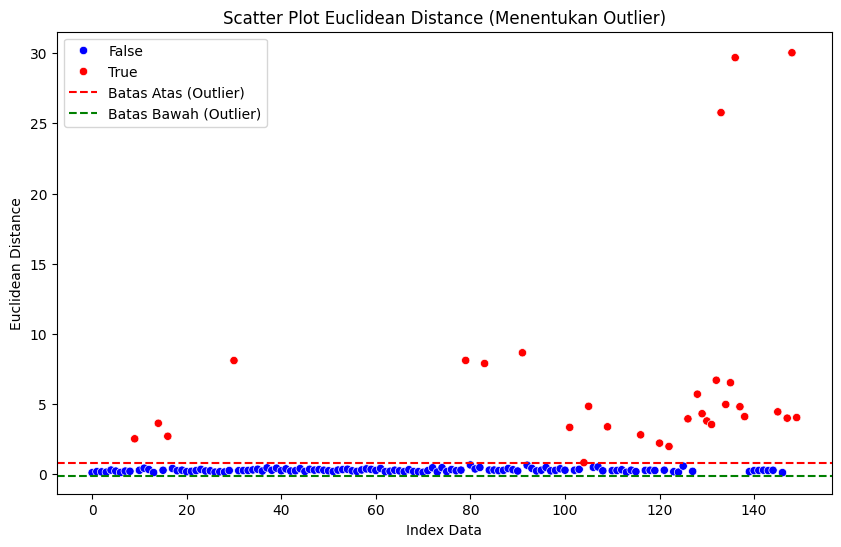

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dengan ukuran 10x6
plt.figure(figsize=(10, 6))

# Scatter plot Euclidean Distance dengan warna merah untuk outlier
sns.scatterplot(x=range(len(df_combined)), y=df_combined['euclidean_distance'],
                hue=df_combined['euclidean_distance'] > batas_atas,
                palette={False: "blue", True: "red"})

# garis batas bawah dan atas
plt.axhline(y=batas_atas, color='r', linestyle='--', label="Batas Atas (Outlier)")
plt.axhline(y=batas_bawah, color='g', linestyle='--', label="Batas Bawah (Outlier)")

# judul, dan label sumbu
plt.legend()
plt.title("Scatter Plot Euclidean Distance (Menentukan Outlier)")
plt.xlabel("Index Data")
plt.ylabel("Euclidean Distance")

plt.show()


- Dapat dilihat bahwa mem-visualisasikan data sangat efektif untuk mendeteksi Outlier

In [12]:
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.impute import SimpleImputer

# # Create an imputer to replace NaN values with the mean
# imputer = SimpleImputer(strategy='mean')

# # Fit the imputer on your data and transform it
# # Replace result_df with df_combined
# X_imputed = imputer.fit_transform(df_combined[['petal length', 'petal width', 'sepal length', 'sepal width']]) # Updated line

# # Now, use the imputed data for LocalOutlierFactor
# clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# # Replace result_df with df_combined
# y_pred = clf.fit_predict(X_imputed) # Updated line

# # ... (rest of your code)

# # Instead of comparing against ground_truth (which has different size),
# # evaluate using the model's inbuilt outlier prediction
# outlier_index = np.where(y_pred == -1) # Outlier are labeled -1 by LOF

# # Print outliers
# print("Data yang diduga outlier (menggunakan LocalOutlierFactor):")
# # Replace result_df with df_combined
# print(df_combined.iloc[outlier_index]) # Updated line
# print (y_pred)
# data = list(enumerate(y_pred))
# print(tabulate(data, headers=["Index", "y_pred"], tablefmt="grid"))
# # Replace result_df with df_combined
# print(f"Jumlah total data: {len(df_combined)}") # Updated line

In [13]:
# cfl = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# y_pred = cfl.fit_predict(X_imputed)

# df_combined['y_pred'] = y_pred

In [14]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split

# iris = load_iris(as_frame=True)
# X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
# y = iris.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

## **Mencari Data yang Diduga Outlier (menggunakan LocalOutlierFactor):**
### **Fungsi Kode**

- ✅ Membersihkan data dari **outlier**
- ✅ Menggunakan **Local Outlier Factor (LOF)** sebagai algoritma deteksi
- ✅ Menyediakan dataset **bersih** untuk proses **analisis** atau **machine learning** berikutnya


In [15]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer

# Contoh DataFrame (pastikan df_combined sudah tersedia di kode utama)
# df_combined = pd.read_csv("your_data.csv") # Uncomment jika membaca dari file

# Pastikan kolom yang digunakan tersedia di df_combined
selected_columns = ['petal length', 'petal width', 'sepal length', 'sepal width']

# Mengatasi missing values dengan imputasi (mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_combined[selected_columns])

# Menerapkan Local Outlier Factor (LOF)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X_imputed)

# Menentukan indeks data outlier
outlier_index = np.where(y_pred == -1)[0]  # Indeks data yang terdeteksi sebagai outlier

# Menampilkan data yang diduga outlier
columns_to_drop = ['y_pred']
df_combined.drop(columns=[col for col in columns_to_drop if col in df_combined.columns], inplace=True)


print(df_combined.iloc[outlier_index])

# Menampilkan hasil prediksi LOF
data = list(enumerate(y_pred))
print("\nHasil prediksi LOF (-1 = outlier):")
# print(tabulate(data, headers=["Index", "y_pred"], tablefmt="grid"))

# Menyaring hanya data yang bukan outlier (y_pred == 1)
df_cleaned = df_combined.iloc[y_pred == 1].reset_index(drop=True)

# Menampilkan jumlah data sebelum dan sesudah penyaringan
print(f"\nJumlah total data sebelum filtering: {len(df_combined)}")
print(f"Jumlah total data setelah filtering: {len(df_cleaned)}")

      id            Class  sepal length  sepal width  petal length  \
79   106   Iris-virginica           7.6          3.0          66.0   
91   118   Iris-virginica           7.7          3.8          67.0   
126   10      Iris-setosa          49.0         31.0           1.5   
128   17      Iris-setosa          54.0         39.0           1.3   
129   20      Iris-setosa          51.0         38.0           1.5   
130   25      Iris-setosa          48.0         34.0           1.9   
131   36      Iris-setosa          50.0         32.0           1.2   
132   51  Iris-versicolor          70.0         32.0           4.7   
134   67  Iris-versicolor          56.0         30.0           4.5   
135   82  Iris-versicolor          55.0         24.0           3.7   
137  133   Iris-virginica          64.0         28.0           5.6   
138  137   Iris-virginica          63.0         34.0           5.6   
145    2      Iris-setosa           4.9          3.0          50.0   
147   79  Iris-versi

## **Mencari Data yang Diduga Outlier (menggunakan Euclidean Distance):**
### **Penjelasan Singkat Kode**

- ✅ Mendeteksi data **outlier** menggunakan **Local Outlier Factor (LOF)**
- ✅ Menentukan data mana yang terdeteksi sebagai **outlier**
- ✅ Menampilkan **data outlier**
- ✅ Menghitung dan menampilkan **total outlier**


In [34]:
# Menentukan fitur yang digunakan dalam perhitungan jarak
feature_column = ['petal length', 'petal width', 'sepal length', 'sepal width']


# Deteksi Outlier dengan LOF untuk perbandingan
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_lof = lof.fit_predict(X)

outliers_lof = df_combined[y_lof == -1]  # -1 berarti outlier di LOF

print(tabulate(outliers_lof, headers="keys", tablefmt="grid"))
print(f"Total Outlier (LOF 10%): {len(outliers_lof)} dari {len(df_combined)} data")


+-----+------+----------------+----------------+---------------+----------------+---------------+----------------------+-----------+
|     |   id | Class          |   sepal length |   sepal width |   petal length |   petal width |   euclidean_distance |   outlier |
+=====+======+================+================+===============+================+===============+======================+===========+
|   9 |   13 | Iris-setosa    |            4.8 |           3   |             14 |            10 |              2.52299 |        -1 |
+-----+------+----------------+----------------+---------------+----------------+---------------+----------------------+-----------+
|  14 |   19 | Iris-setosa    |            5.7 |           3.8 |             17 |            13 |              3.62989 |        -1 |
+-----+------+----------------+----------------+---------------+----------------+---------------+----------------------+-----------+
|  16 |   22 | Iris-setosa    |            5.1 |           3.7 |     

## **Data Bersih dari Outlier**
### **Penjelasan Singkat Kode**

- ✅ **Mengisi missing value** pada dataset dengan rata-rata tiap kolom
- ✅ **Menghapus outlier**, sehingga hanya menyisakan data **bersih (inlier)**
- ✅ **Menampilkan tabel data akhir** dan menghitung **total data awal**, **jumlah outlier**, serta **total data bersih**


In [17]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from tabulate import tabulate

# Persiapan Data
feature_column = ['petal length', 'petal width', 'sepal length', 'sepal width']
X = df_combined[feature_column]

# Mengisi missing value dengan rata-rata
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Deteksi Outlier Menggunakan LOF
contamination_value = 0.1  # Sesuaikan jika ingin lebih banyak/makin sedikit outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination_value)
y_pred = lof.fit_predict(X_imputed)

# Tambahkan hasil prediksi ke DataFrame
df_combined['outlier'] = y_pred

# Data Statistik Outlier
total_data_awal = len(df_combined)
total_outliers = (df_combined['outlier'] == -1).sum()

# Filter hanya inlier (outlier == 1)
df_clean = df_combined[df_combined['outlier'] == 1].reset_index(drop=True)
total_bersih = len(df_clean)

# Hapus Kolom yang Tidak Diperlukan
columns_to_drop = ['euclidean_distance', 'y_pred', 'outlier']
df_clean.drop(columns=[col for col in columns_to_drop if col in df_clean.columns], inplace=True)

# Menampilkan Data Bersih
print("\nData Bersih Setelah Menghapus Outlier (Metode LOF)")
print(tabulate(df_clean, headers="keys", tablefmt="grid"))

# Menampilkan Total Data
print("\n==============================")
print(f"Total Data Awal     : {total_data_awal}")
print(f"Total Outlier       : {total_outliers}")
print(f"Total Data Bersih   : {total_bersih}")
print("==============================")



Data Bersih Setelah Menghapus Outlier (Metode LOF)
+-----+------+-----------------+----------------+---------------+----------------+---------------+
|     |   id | Class           |   sepal length |   sepal width |   petal length |   petal width |
+=====+======+=================+================+===============+================+===============+
|   0 |    1 | Iris-setosa     |            5.1 |           3.5 |            1.4 |           0.2 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+
|   1 |    3 | Iris-setosa     |            4.7 |           3.2 |            1.3 |           0.2 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+
|   2 |    4 | Iris-setosa     |            4.6 |           3.1 |            1.5 |           0.2 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+
|   3 |    5 | Iris-setosa     |            5   |        

## **Membandingkan Akurasi**


### ✅ 1. Persiapan Data dan Encoding Kelas
- Mengambil fitur utama: **"petal length"** dan **"petal width"** sebagai input (X).
- Target klasifikasi diambil dari kolom **"Class"**.
- Target dikonversi ke bentuk numerik menggunakan **LabelEncoder()** agar bisa diproses oleh algoritma KNN.

---

### ✅ 2. Membuat dan Melatih Model KNN (Tanpa Menghapus Outlier)
- Dataset dibagi menjadi **data latih (80%)** dan **data uji (20%)** menggunakan `train_test_split`.
- Model menggunakan **Pipeline** yang terdiri dari:
  - `StandardScaler()` untuk normalisasi data.
  - `KNeighborsClassifier(n_neighbors=11)` sebagai algoritma KNN.
- Model dilatih dan diuji **langsung** menggunakan data **yang masih mengandung outlier**.
- Evaluasi model dilakukan menggunakan:
  - `classification_report`
  - `accuracy_score`

---

### ✅ 3. Deteksi Outlier Menggunakan Local Outlier Factor (LOF)
- **LOF (Local Outlier Factor)** digunakan untuk mendeteksi data yang dianggap outlier berdasarkan jarak dengan tetangga terdekatnya.
- Parameter LOF:
  - `n_neighbors=20` : jumlah tetangga terdekat yang dihitung.
  - `contamination=0.1` : mengasumsikan sekitar 10% data adalah outlier.
- Hasil LOF:
  - Label `-1` menunjukkan data **outlier**.
  - Label `1` menunjukkan data **inlier** atau data normal.

---

### ✅ 4. Membersihkan Data dari Outlier
- Data yang terdeteksi sebagai **outlier** (label `-1`) dihapus dari dataset.
- Hanya data **inlier** yang tersisa dan digunakan untuk proses pelatihan ulang model.

---

### ✅ 5. Melatih Ulang Model KNN Setelah Outlier Dihapus
- Model KNN dilatih ulang dengan data **yang sudah bersih (tanpa outlier)**.
- Proses training dan testing sama seperti model sebelumnya:
  - Split data
  - Pipeline (StandardScaler + KNN)
- Model diuji ulang dan hasilnya dibandingkan.

---

### ✅ 6. Evaluasi dan Perbandingan Hasil
- Menampilkan hasil evaluasi model **sebelum** dan **sesudah** outlier dihapus.
- Evaluasi menggunakan:
  - `classification_report` (precision, recall, f1-score)
  - `accuracy_score`
- Tujuan evaluasi:
  - Melihat apakah **menghapus outlier meningkatkan performa model**.
  - Membuktikan bahwa **outlier berpengaruh terhadap akurasi model**.

---

### 📈 Kesimpulan:
- **Outlier** dalam dataset bisa **menurunkan akurasi model** karena data tidak representatif.
- Dengan menghapus outlier, model menjadi lebih **stabil, akurat**, dan **mampu melakukan generalisasi** lebih baik pada data baru.


In [30]:
feature_columns = ["petal length", "petal width"]
X = df_combined[feature_columns]
y = df_combined["Class"]

# Encode target class menjadi angka
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 1. MODEL DENGAN OUTLIER
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

pipeline_ori = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

pipeline_ori.fit(X_train_ori, y_train_ori)
y_pred_ori = pipeline_ori.predict(X_test_ori)

print("\n HASIL MODEL DENGAN OUTLIER :")
print(classification_report(y_test_ori, y_pred_ori, target_names=label_encoder.classes_))
print(f"Akurasi: {accuracy_score(y_test_ori, y_pred_ori):.4f}")

# 2. DETEKSI DAN HAPUS OUTLIER
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)

# Tandai outlier
df_combined["outlier"] = outlier_labels

# Filter hanya data inlier
df_cleaned = df_combined[df_combined["outlier"] == 1].drop(columns=["outlier"])

# 3. MODEL SETELAH OUTLIER DIHAPUS
X_clean = df_cleaned[feature_columns]
y_clean = label_encoder.transform(df_cleaned["Class"])

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

pipeline_clean = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

pipeline_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = pipeline_clean.predict(X_test_clean)

print("\nHASIL MODEL SETELAH OUTLIER DIHAPUS :")
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))
print(f"Akurasi: {accuracy_score(y_test_clean, y_pred_clean):.4f}")



 HASIL MODEL DENGAN OUTLIER :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.80      0.89        10
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.73      1.00      0.84         8

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.90        30
   weighted avg       0.93      0.90      0.90        30

Akurasi: 0.9000

HASIL MODEL SETELAH OUTLIER DIHAPUS :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.86      0.86      0.86         7

       accuracy                           0.93        27
      macro avg       0.92      0.92      0.92        27
   weighted avg       0.93      0.93      0.93        27

Akurasi: 0.9259
